IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

IMPORTING THE FILE

In [2]:
df=pd.read_csv('Train.csv')
df.shape

(8523, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df1=df.copy()

IMPUTING THE NULL VALUES WITH MEAN

In [8]:
df1['Item_Weight'].mean()

12.857645184135976

In [9]:
df1['Item_Weight']=df1['Item_Weight'].replace(np.NaN,df1['Item_Weight'].mean())

In [10]:
df1['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [ ]:
IMPUTING THE NULL VALUES WITH MEDIAN

In [11]:
df1.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
df1['Outlet_Size']=df1['Outlet_Size'].fillna('Medium')

In [13]:
df1['Outlet_Size']

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [14]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
df1.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5373,FDB33,17.75,Low Fat,0.014603,Fruits and Vegetables,158.6262,OUT049,1999,Medium,Tier 1,Supermarket Type1,3819.0288
7019,FDY47,8.60,Regular,0.000000,Breads,131.5310,OUT049,1999,Medium,Tier 1,Supermarket Type1,2466.7890
1425,FDE59,12.15,Low Fat,0.062640,Starchy Foods,36.6532,OUT017,2007,Medium,Tier 2,Supermarket Type1,251.6724
1882,FDP25,15.20,Low Fat,0.021251,Canned,216.5824,OUT045,2002,Medium,Tier 2,Supermarket Type1,5241.1776
6088,FDG45,8.10,Low Fat,0.128760,Fruits and Vegetables,213.7902,OUT017,2007,Medium,Tier 2,Supermarket Type1,5946.9256


In [16]:
df1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [17]:
num_vars=[col for col in df1.columns if df1[col].dtypes!='object']
num_vars

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

CHECKING FOR OUTLIERS

In [18]:
def plotvariable(df1, variable):
    plt.figure(figsize=(16,4))
    #histogram
    plt.subplot(1,2,1)
    plt.hist(df1[variable], alpha=0.5)
    
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df1[variable])
    plt.show()

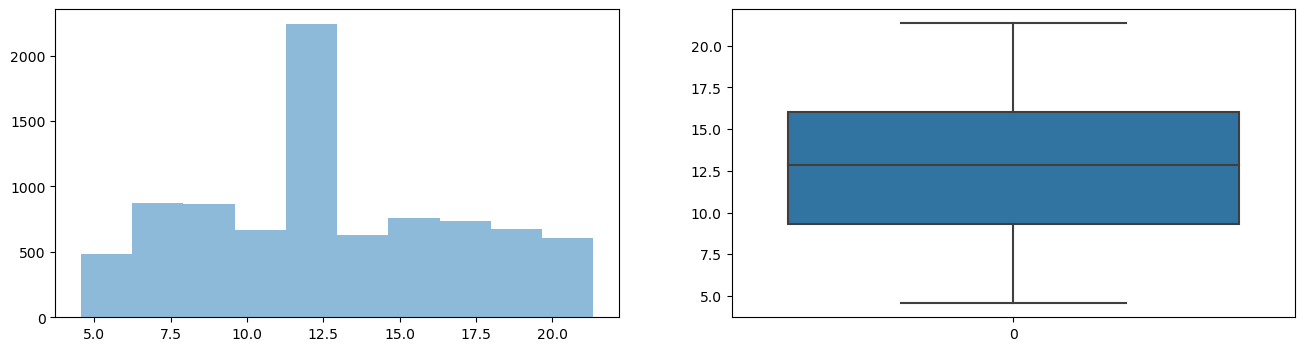

In [19]:
plotvariable(df1, 'Item_Weight')

<Axes: >

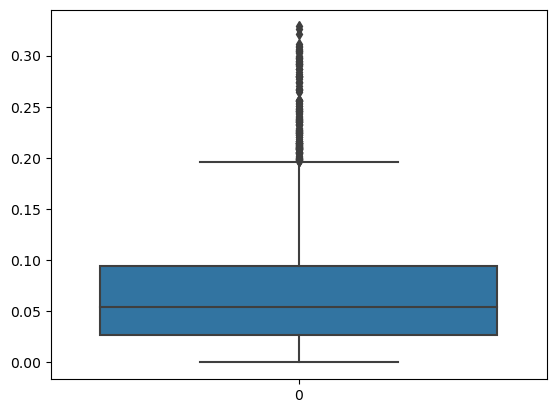

In [20]:
sns.boxplot(df1['Item_Visibility'])

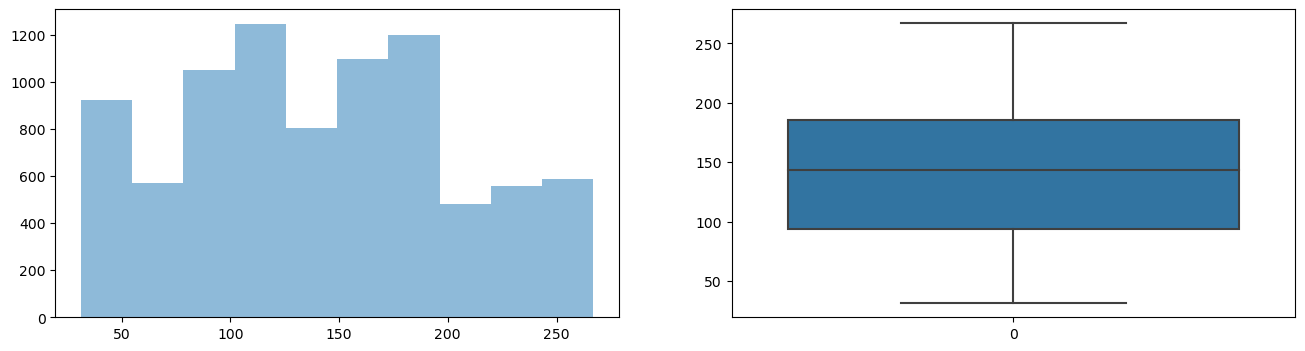

In [21]:
plotvariable(df1, 'Item_MRP')

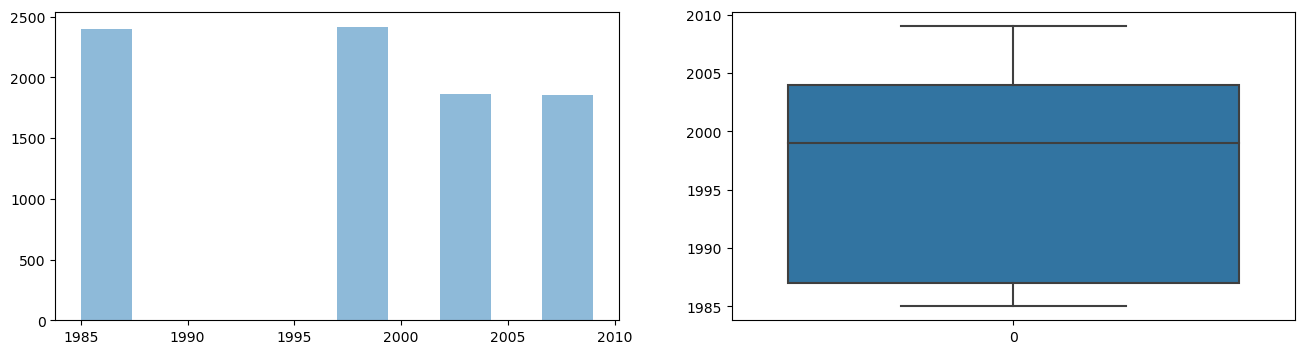

In [22]:
plotvariable(df1, 'Outlet_Establishment_Year')

<Axes: >

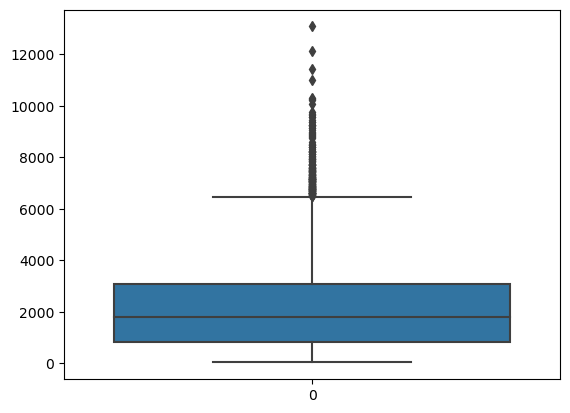

In [23]:
sns.boxplot(df1['Item_Outlet_Sales'])

REMOVING OUTLIERS USING IQR METHOD

In [24]:
def find_boundaries(df1, variables):
    #Lets find the IQR (Inter quantile range)
    Q1 = df1[variables].quantile(.25)
    Q3 = df1[variables].quantile(.75)
    IQR= Q3-Q1
    lower_boundry = Q1 - 1.5*IQR
    upper_boundry = Q3 + 1.5*IQR
    
    return lower_boundry, upper_boundry

In [25]:
lower_charges, upper_charges = find_boundaries(df1,'Item_Visibility')
print('Upper limit is ',upper_charges)
print('lower limit is ',lower_charges)

Upper limit is  0.195979015
lower limit is  -0.07440424500000001


In [26]:
#Adjusting outliers with upper limit 
#If the value is above upper limit charges there it will adjust to 34524.
#For example the charges was 40000 it will adjust it to 35000.

df1['Item_Visibility']= np.where(df1['Item_Visibility']> upper_charges,upper_charges,
                         np.where(df1['Item_Visibility']< lower_charges,lower_charges, df1['Item_Visibility']))

<Axes: >

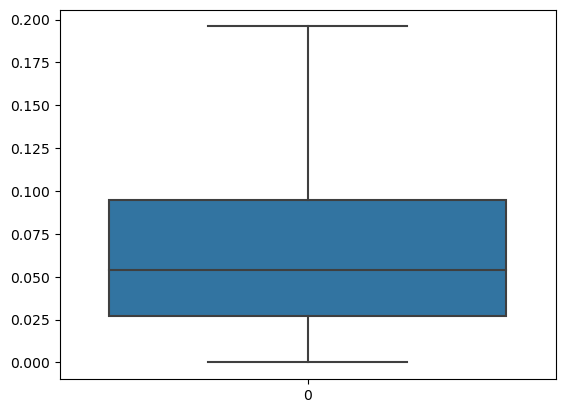

In [27]:
sns.boxplot(df1['Item_Visibility'])

In [28]:
lower_charges, upper_charges = find_boundaries(df1,'Item_Outlet_Sales')
print('Upper limit is ',upper_charges)
print('lower limit is ',lower_charges)

Upper limit is  6501.8699
lower limit is  -2566.3261


In [29]:
#Adjusting outliers with upper limit 
#If the value is above upper limit charges there it will adjust to 34524.
#For example the charges was 40000 it will adjust it to 35000.

df1['Item_Outlet_Sales']= np.where(df1['Item_Outlet_Sales']> upper_charges,upper_charges,
                         np.where(df1['Item_Outlet_Sales']< lower_charges,lower_charges, df1['Item_Outlet_Sales']))

<Axes: >

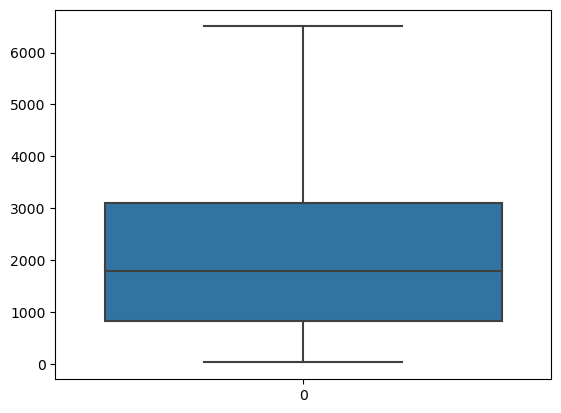

In [30]:
sns.boxplot(df1['Item_Outlet_Sales'])

In [31]:
cat_vars=[col for col in df1.columns if df1[col].dtypes=='object']
cat_vars

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [32]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [33]:
a='Item_Identifier'

In [34]:
df1=df1.drop(a,axis=1)

In [35]:
df1.shape

(8523, 11)

CONVERTING CATEGORICAL FEATURES INTO NUMERICAL FEATURES

In [36]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder = LabelEncoder()
df1["Item_Fat_Content"]=labelencoder.fit_transform(df1["Item_Fat_Content"])
df1["Outlet_Size"]=labelencoder.fit_transform(df1["Outlet_Size"])
df1["Outlet_Location_Type"]=labelencoder.fit_transform(df1["Outlet_Location_Type"])
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380
1,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228
2,17.50,1,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700
3,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800
4,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052


In [37]:
df1.shape

(8523, 11)

In [38]:
oe =OneHotEncoder(sparse=False,handle_unknown="error",drop="first")

In [39]:
oe

OneHotEncoder(drop='first', sparse=False)

C:\Users\vivek\AppData\Local\Temp\ipykernel_2084\3608926592.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),cmap='GnBu',annot=True)


<Axes: >

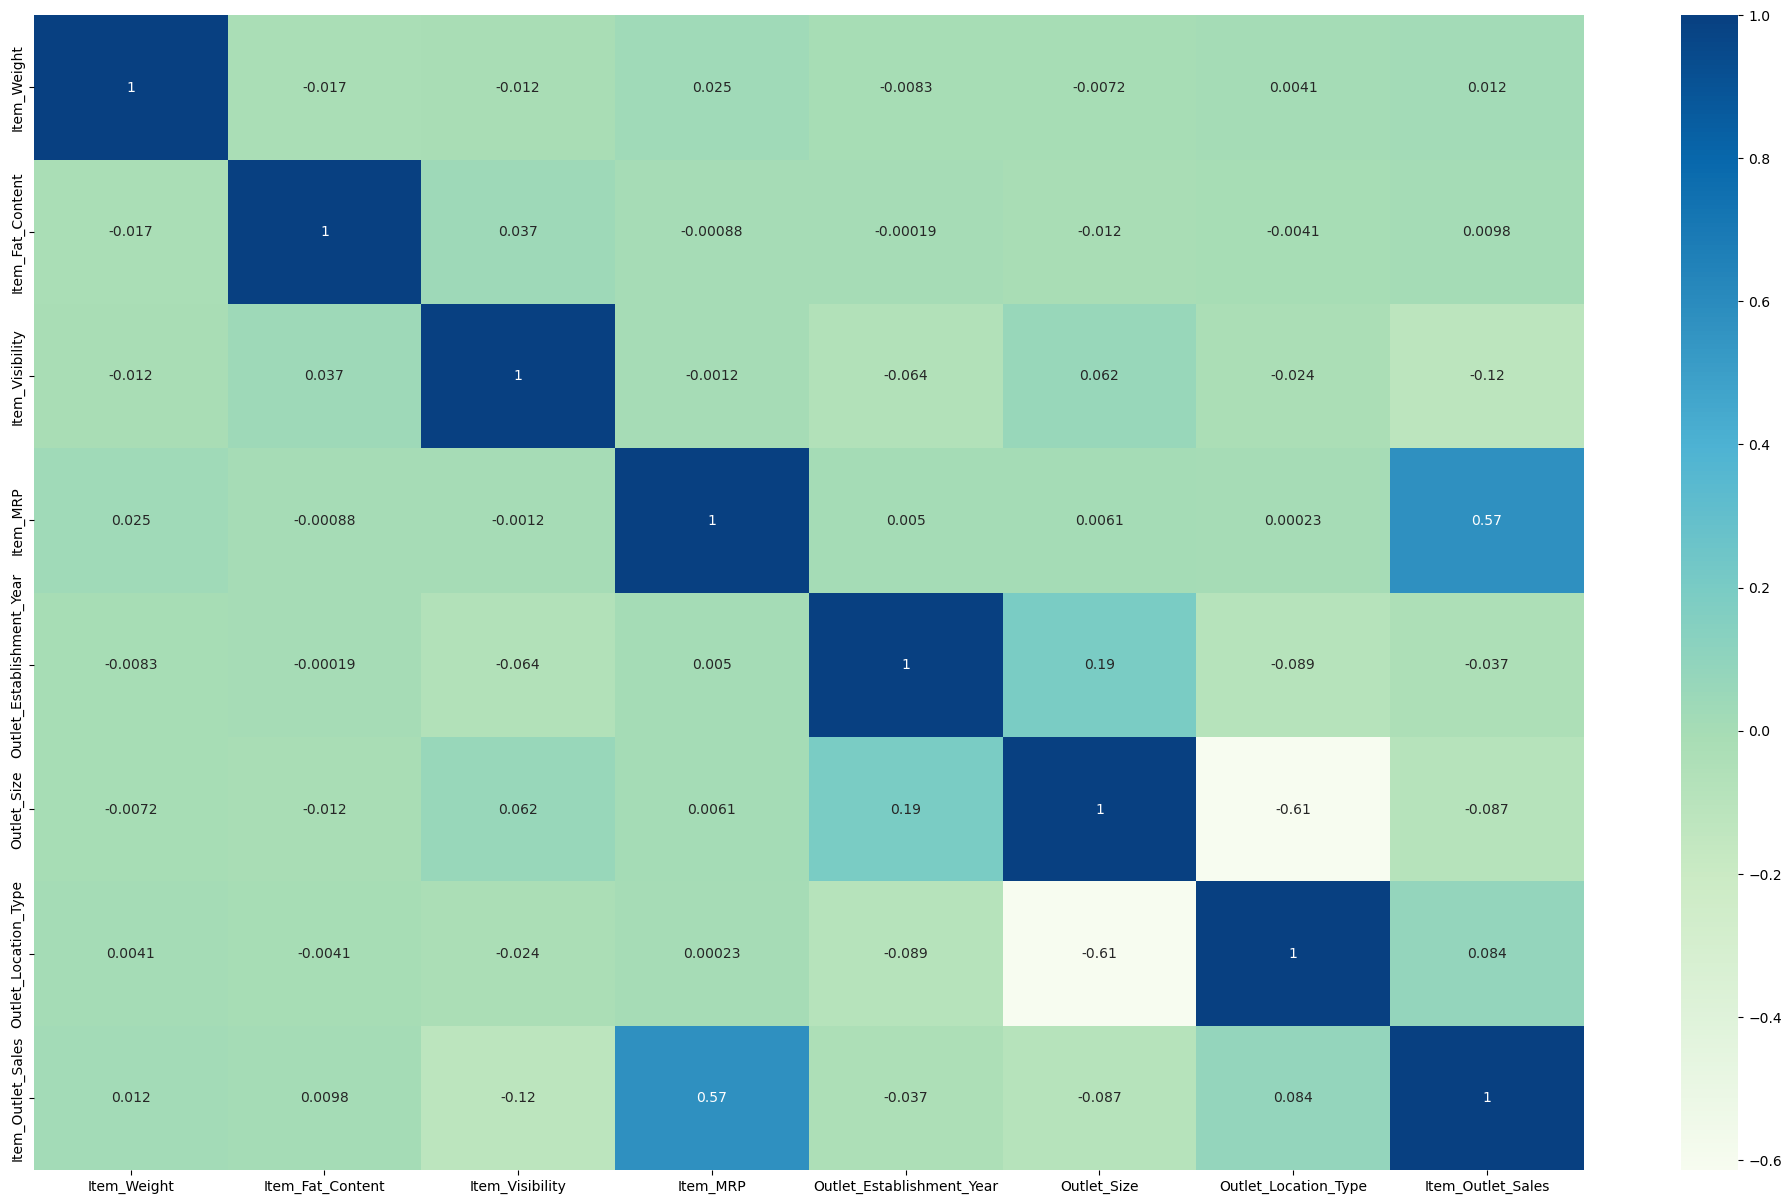

In [40]:
#Correlation
plt.figure(figsize=(25,15))
sns.heatmap(df1.corr(),cmap='GnBu',annot=True)

In [41]:
df1['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [42]:
df1['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [43]:
df1['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [44]:
ohe = OneHotEncoder()
a = ohe.fit_transform(df1.Item_Type.values.reshape(-1,1)).toarray()
OHE = pd.DataFrame(a, columns = ['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'])
df1 = pd.concat([df1, OHE], axis=1)
df1 = df1.drop("Item_Type",axis = 1)

In [45]:
ohe = OneHotEncoder()
a = ohe.fit_transform(df1.Outlet_Identifier.values.reshape(-1,1)).toarray()
OHE = pd.DataFrame(a, columns = ['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'])
df1 = pd.concat([df1, OHE], axis=1)
df1 = df1.drop("Outlet_Identifier",axis = 1)

In [46]:
ohe = OneHotEncoder()
a = ohe.fit_transform(df1.Outlet_Type.values.reshape(-1,1)).toarray()
OHE = pd.DataFrame(a, columns = ['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'])
df1 = pd.concat([df1, OHE], axis=1)
df1 = df1.drop("Outlet_Type",axis = 1)

In [47]:
df1.shape

(8523, 38)

In [48]:
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Dairy,Soft Drinks,...,OUT027,OUT045,OUT017,OUT046,OUT035,OUT019,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3
0,9.30,1,0.016047,249.8092,1999,1,0,3735.1380,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,5.92,2,0.019278,48.2692,2009,1,2,443.4228,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17.50,1,0.016760,141.6180,1999,1,0,2097.2700,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,19.20,2,0.000000,182.0950,1998,1,2,732.3800,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.93,1,0.000000,53.8614,1987,0,2,994.7052,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
target_feature='Item_Outlet_Sales'

In [50]:
y=df1[target_feature]

In [51]:
y.shape

(8523,)

In [52]:
x=df1.drop(target_feature,axis=1)

In [53]:
x.shape

(8523, 37)

SPLITTING THE DATASET INTO TRAINING AND TESTING

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=3)

In [55]:
x_train.shape

(7670, 37)

In [56]:
y_train.shape

(7670,)

In [57]:
x_test.shape

(853, 37)

In [58]:
y_test.shape

(853,)

USING SCALING TEQNIQUES FOR THE DATASET

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [60]:
x_train


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Dairy,Soft Drinks,Meat,...,OUT027,OUT045,OUT017,OUT046,OUT035,OUT019,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3
2765,11.100000,2,0.060303,175.8712,1998,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
696,12.600000,1,0.007450,186.7556,1987,0,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5047,19.100000,4,0.025867,147.6418,2004,2,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4850,11.600000,2,0.144604,240.8222,2009,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1544,5.465000,2,0.048487,131.2626,1987,0,2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7161,12.857645,1,0.032610,37.4822,1985,1,2,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2707,8.935000,1,0.040410,52.9298,2007,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6400,16.350000,1,0.034393,50.8324,1998,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1688,12.857645,2,0.121044,59.4220,1985,1,2,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
x_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Dairy,Soft Drinks,Meat,...,OUT027,OUT045,OUT017,OUT046,OUT035,OUT019,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3
4258,19.500000,0,0.082484,179.2002,1987,0,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2574,12.350000,1,0.093279,118.7124,2004,2,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
517,9.800000,1,0.013898,46.5060,2009,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3004,18.250000,1,0.054455,142.0154,2009,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2159,18.250000,1,0.100844,166.3526,1998,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,12.857645,2,0.139561,170.4764,1985,1,2,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8016,12.857645,1,0.018276,115.2808,1985,2,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6677,18.000000,1,0.039011,147.7418,1997,2,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7928,20.200000,2,0.060045,128.3678,2009,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
x_train_scaled


array([[0.38969932, 0.5       , 0.30769972, ..., 0.        , 0.        ,
        0.        ],
       [0.47901161, 0.25      , 0.03801559, ..., 1.        , 0.        ,
        0.        ],
       [0.86603156, 1.        , 0.13198995, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.70229235, 0.25      , 0.17549357, ..., 0.        , 0.        ,
        0.        ],
       [0.4943522 , 0.5       , 0.61763607, ..., 0.        , 0.        ,
        1.        ],
       [0.30604347, 0.25      , 0.97312079, ..., 0.        , 0.        ,
        0.        ]])

In [63]:
# converting to data frame bcz its in array format
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [64]:
np.round(x_train.describe(), 1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Dairy,Soft Drinks,Meat,...,OUT027,OUT045,OUT017,OUT046,OUT035,OUT019,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3
count,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,...,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0
mean,12.9,1.4,0.1,141.0,1997.8,1.2,1.1,0.1,0.0,0.0,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.7,0.1,0.1
std,4.2,0.6,0.0,62.2,8.4,0.6,0.8,0.3,0.2,0.1,...,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.5,0.3,0.3
min,4.6,0.0,0.0,31.3,1985.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,9.3,1.0,0.0,93.8,1987.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,12.9,1.0,0.1,143.1,1999.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,16.0,2.0,0.1,185.9,2004.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
max,21.4,4.0,0.2,266.9,2009.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [65]:
np.round(x_train_scaled.describe(), 1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Dairy,Soft Drinks,Meat,...,OUT027,OUT045,OUT017,OUT046,OUT035,OUT019,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3
count,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,...,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0,7670.0
mean,0.5,0.3,0.3,0.5,0.5,0.6,0.6,0.1,0.0,0.0,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.7,0.1,0.1
std,0.3,0.2,0.2,0.3,0.3,0.3,0.4,0.3,0.2,0.1,...,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.5,0.3,0.3
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.3,0.2,0.1,0.3,0.1,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.5,0.2,0.3,0.5,0.6,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,0.7,0.5,0.5,0.7,0.8,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


APPLYING LASSO REGRESSION ALGORITHM ON THE DATASET

In [66]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha =1)
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [67]:
y_pred=lasso.predict(x_test)

In [68]:
x_test.shape

(853, 37)

In [69]:
y_pred.shape

(853,)

In [70]:
y_test.shape

(853,)

TRAINING THE DATASET

In [71]:
#TRAIN SCORE
score=lasso.score(x_train,y_train)*100
print("trained score = ",score)

trained score =  57.193757487225305


TESTING THE DATASET

In [72]:
test_score=lasso.score(x_test,y_test)*100
print("test score = ",test_score)

test score =  61.60797691549404


EVALUATING THE MODEL

In [73]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [74]:
#R2-SCORE 
rsq=r2_score(y_test,y_pred)*100
print("r2 score = ",rsq)

r2 score =  61.60797691549404


In [75]:
#MEAN ABSOLUTE ERROR (MAE)
mae=mean_absolute_error(y_test,y_pred)
print("mean absolute error = ",mae)

mean absolute error =  797.1195753720698


In [76]:
#MEAN SQUARE ERROR (MSE)
mse=mean_squared_error(y_test,y_pred)
print("mean square error = ",mse)

mean square error =  1109145.3989939883


In [77]:
import math
#MEAN SQUARE ERROR (MSE)
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
print("root mean square error = ",rmse)

root mean square error =  1053.1597215019137


In [78]:
new_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Variance':y_test-y_pred})
new_df

,Actual,Predicted,Variance
4258,2865.6032,2806.197409,59.405791
2574,2607.2728,2058.630497,548.642303
517,372.8480,578.749229,-205.901229
3004,850.8924,1987.398070,-1136.505670
2159,164.4526,730.067079,-565.614479
...,...,...,...
231,3435.5280,4104.383134,-668.855134
8016,117.1808,-9.462529,126.643329
6677,4119.9704,2338.106479,1781.863921
7928,1398.8458,1837.865702,-439.019902


In [79]:
pwd

'C:\\Users\\vivek\\OneDrive\\Documents\\projects'

In [80]:
import pickle

In [81]:
final_model="LASSO.pkl"

In [82]:
pickle.dump(lasso,open(final_model,'wb'))

In [83]:
loaded_model=pickle.load(open(final_model,'rb'))

In [84]:
a=loaded_model.predict(x_test)
print("predicted value will be ",a)

predicted value will be  [ 2806.19740921  2058.63049741   578.74922871  1987.39807011
   730.06707895   932.08749533  2002.79130525  2395.48527234
  1600.10931471  2020.14363097  1688.01060403  3278.56830328
  4138.35527154   672.63209734  3540.12988301  4261.92199416
  2002.08959658  2712.12801094  1720.66924608  2526.80486872
  2906.88415768  3583.42738688  1843.98095856  2500.57718008
  1530.02430417  3667.67673605  2811.16898998  1993.48606566
  3987.44724223  3738.55139939  4155.58747429  1078.86925798
  1602.104511     866.05309605  1807.80616263  1614.09705592
  1417.80760425  1398.93298269  5280.74767057  1097.67383254
  1187.7280991   2526.81477739  3951.95109209  2093.33034273
  5130.28473838  1496.0139952   1629.05446389  2611.5661608
  3945.83870535   953.84358995   860.61665516   564.7025039
  1022.76813572  1874.18516383  4247.51876669  1590.30950942
  1893.95770382  2654.78047921  2413.44606643  2971.84236008
   859.26116359   749.17556218  1952.63913199  1920.69022693
 